In [1]:
#import numpy
import numpy as np #import numpy

In [3]:
# Problem 2 Part A
f_height = float(input('What is the height of the particle?:'))
f_scattering_angle = np.pi - 2* np.arcsin(f_height)  # Formula from Assignment Paper
print(np.round(f_scattering_angle*(180/np.pi),0), 'is the scattering angle (degrees)')

What is the height of the particle?:0.25
151.0 is the scattering angle (degrees)


### 2 Part b Pseudo Code for  Simulation of Scattering
1. Import required packages for handling arrays and plotting tools.
2. Generate an array of random heights ranging from [0, 1] and input them into the equation derived in Part a.
2. Take the input array and plot it as a histogram 
3. Take the output array and plot it as a histogram 
4. Given a sufficiently large input array that it emulates true randomness, calculate the probability that the scattering angle \theta  lies in the range  $ 175 ^{\circ} < \theta < 185 ^{\circ}   $ vs   $ 20 ^{\circ} < \theta <  30 ^{\circ}   $ or  $ 170 ^{\circ} < \theta < 190 ^{\circ}  $ vs   $  90 ^{\circ} < \theta <  110 ^{\circ}   $ 

5. This calculation is done by comparing the ratios of particles within each range to the the total number of particles and to each range. Find ratios 

In [2]:
#import required packages
import matplotlib.pyplot as plt #import stuff for plotting
import time 
import seaborn as sns
sns.set()

In [3]:
i_number = int(input('How many particles are you shooting? :'))  # try 10000000. Not perfect but not a huge computation time
a_height = np.random.uniform(-1, 1, i_number)            # now an array instead of single float
a_scattering_angle = np.pi - 2* np.arcsin(a_height)  # Formula from Assignment Paper
a_scattering_angle_deg = np.round(a_scattering_angle*(180/np.pi))

How many particles are you shooting? :10000000


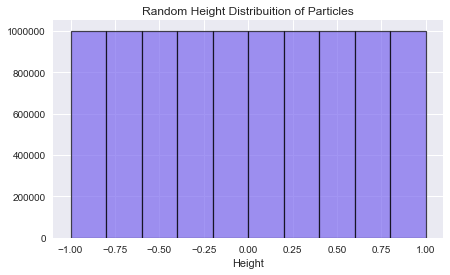

In [4]:
# Plotting Random Height Distribuition of Particles
plt.figure(figsize = (7,4))
plt.hist(a_height,edgecolor='black', linewidth=1.2, alpha = 0.7, color = 'mediumslateblue')
plt.title('Random Height Distribuition of Particles')
plt.xlabel('Height')
plt.show()

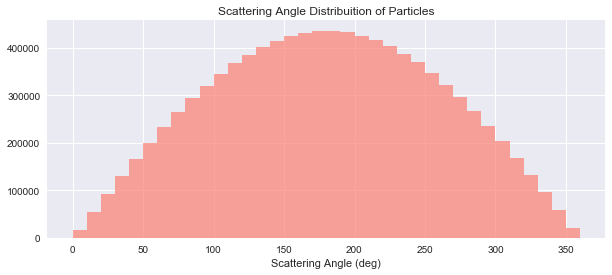

In [5]:
# Plotting Angle Distribuition of Particles
plt.figure(figsize = (10,4))

data = a_scattering_angle_deg
binwidth= 10
bins=np.arange(min(data), max(data)+ binwidth, binwidth)
plt.hist(data,bins  \
         , alpha = 0.7, color = 'salmon')
plt.title('Scattering Angle Distribuition of Particles')
plt.xlabel('Scattering Angle (deg)')
plt.show()

## 2 Part B
The distribuition of $ \theta\ $ is not uniform, but rather is something like a wide gaussian. This makes intuitive sense because the surface area near the center is smaller for corresponding height, so their are more angles within within narrow ranges at the center then near the edges. 

In [6]:
# probabilities 
a_histval,a_binedge = np.histogram(data, bins) # The histogram values and bin edges for probability
# finding the cuts I want
i_ninety_index = np.where(np.logical_or(a_binedge == 90,a_binedge == 100)) 
i_oneseventy_index =np.where(np.logical_or(a_binedge == 170,a_binedge == 180))
i_twenty_index =np.where(a_binedge == 20)
# Calculating the probabilities
f_ninety_probability = np.sum(a_histval[i_ninety_index])/np.sum(a_histval) * 100
f_oneseventy_probability = np.sum(a_histval[i_oneseventy_index])/np.sum(a_histval) * 100
f_twenty_probability = np.sum(a_histval[i_twenty_index])/np.sum(a_histval) * 100
#  little bit of a jig so I can get a cut offset by 5
a_histval_weird, a_binedge_weird = np.histogram(data,1, range = (175,185))
# more calculating probabilities
f_oneseventyfive_probability = np.sum(a_histval_weird)/ np.sum(a_histval)*100
# output of ratios of probabilities
print(f_ninety_probability/f_oneseventy_probability )
print(f_twenty_probability/f_oneseventy_probability )

0.763941128842388
0.10660319392683024


### 2 Part C Probalities of Scattering Angle
Running the above code for 10000000 particles yields a probability output of  $ 76.246 \% $ for the scattering angle will fall between  $  90 ^{\circ} < \theta <  110 ^{\circ}   $  as  $ 170 ^{\circ} < \theta < 190 ^{\circ}  $. Running the same code for 20000000 (double of number before) particles the probability changes neglibly to be $ 76.185 \% $ for this angle range. 

Running the above code for 10000000 particles yields a probability output of $ 10.617 \%  $ for the scattering angle will fall between  $  20 ^{\circ} < \theta <  30 ^{\circ}   $  as  $ 175 ^{\circ} < \theta < 185 ^{\circ}  $. Running the same code for 20000000 (double of number before) particles the probability changes neglibly to be $ 10.643 \% $ for this angle range.

In fact, re-running the code for the same number of particles numerous times, small variances in the ouput probabilities can be observed on the same order as those observed when doubling the sampling number. From this, one can safely conclude that variance observed is merely due to variances caused by the finite random sampling, and that doubling the number of samples when already sampling a large number has virtually no effect on the probability analysis. 
